KELOMPOK 7 - IF-44-10


*   Berlian Muhammad Galin Al Awienoor	(1301204378)

*   Kiki Dwi Prasetyo				 	(1301204027)



In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xlsxwriter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import time
from statistics import mean

In [ ]:
#import data train dari traintest.xlsx
dfTrain = pd.read_excel("https://github.com/berlianm/k-Nearest-Neighbors/blob/main/traintest.xlsx?raw=true", sheet_name='train')
dfTrain

,id,x1,x2,x3,y
0,1,60,64,0,1
1,2,54,60,11,0
2,3,65,62,22,0
3,4,34,60,0,1
4,5,38,69,21,0
...,...,...,...,...,...
291,292,59,64,1,1
292,293,65,67,0,1
293,294,53,65,12,0
294,295,57,64,1,0


In [ ]:
#import data test dari traintest.xlsx
dfTest = pd.read_excel("https://github.com/berlianm/k-Nearest-Neighbors/blob/main/traintest.xlsx?raw=true", sheet_name='test')
dfTest

,id,x1,x2,x3,y
0,297,43,59,2,?
1,298,67,66,0,?
2,299,58,60,3,?
3,300,49,63,3,?
4,301,45,60,0,?
5,302,54,58,1,?
6,303,56,66,3,?
7,304,42,69,1,?
8,305,50,59,2,?
9,306,59,60,0,?


In [ ]:
dfTrain.describe()

,id,x1,x2,x3,y
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,148.500000,52.462838,62.881757,4.111486,0.736486
std,85.592056,10.896367,3.233753,7.291816,0.441285
min,1.000000,30.000000,58.000000,0.000000,0.000000
25%,74.750000,44.000000,60.000000,0.000000,0.000000
50%,148.500000,52.000000,63.000000,1.000000,1.000000
75%,222.250000,61.000000,65.250000,5.000000,1.000000
max,296.000000,83.000000,69.000000,52.000000,1.000000


In [ ]:
dfTest.describe()

,id,x1,x2,x3
count,10.00000,10.000000,10.000000,10.000000
mean,301.50000,52.300000,62.000000,1.500000
std,3.02765,7.972871,3.771236,1.269296
min,297.00000,42.000000,58.000000,0.000000
25%,299.25000,46.000000,59.250000,0.250000
50%,301.50000,52.000000,60.000000,1.500000
75%,303.75000,57.500000,65.250000,2.750000
max,306.00000,67.000000,69.000000,3.000000


Text(0.5, 1.0, 'DATA TRAIN SEBELUM NORMALISASI')

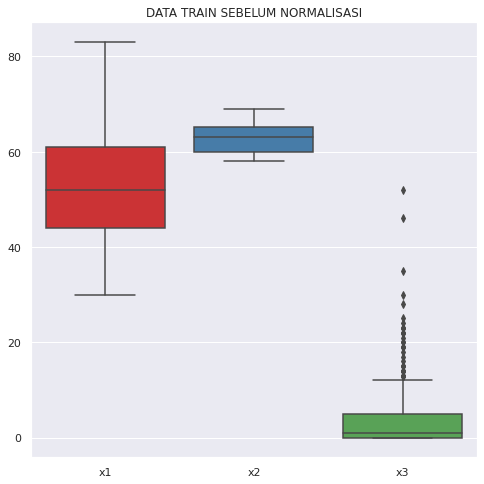

In [ ]:
#menampilkan data train sebelum normalisasi (boxplot)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data=dfTrain[['x1', 'x2', 'x3']], orient="v", palette="Set1")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('DATA TRAIN SEBELUM NORMALISASI')

In [ ]:
#normalisasi data train (min-maks scaling)
df_train_normalisasi = pd.DataFrame(index=dfTrain.index, columns=dfTrain.columns)

xMaks = dfTrain["x1"].max()
xMin  = dfTrain["x1"].min()

for i in range(len(dfTrain)):
    x = dfTrain["x1"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_train_normalisasi["x1"][i] = xBaru

xMaks = dfTrain["x2"].max()
xMin  = dfTrain["x2"].min()

for i in range(len(dfTrain)):
    x = dfTrain["x2"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_train_normalisasi["x2"][i] = xBaru

xMaks = dfTrain["x3"].max()
xMin  = dfTrain["x3"].min()

for i in range(len(dfTrain)):
    x = dfTrain["x3"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_train_normalisasi["x3"][i] = xBaru

df_train_normalisasi['x1'] = df_train_normalisasi['x1'].astype(float)
df_train_normalisasi['x2'] = df_train_normalisasi['x2'].astype(float)
df_train_normalisasi['x3'] = df_train_normalisasi['x3'].astype(float)
df_train_normalisasi['y']  = dfTrain['y']
df_train_normalisasi['id'] = dfTrain['id']
df_train_normalisasi


,id,x1,x2,x3,y
0,1,0.566038,0.545455,0.000000,1
1,2,0.452830,0.181818,0.211538,0
2,3,0.660377,0.363636,0.423077,0
3,4,0.075472,0.181818,0.000000,1
4,5,0.150943,1.000000,0.403846,0
...,...,...,...,...,...
291,292,0.547170,0.545455,0.019231,1
292,293,0.660377,0.818182,0.000000,1
293,294,0.433962,0.636364,0.230769,0
294,295,0.509434,0.545455,0.019231,0


Text(0.5, 1.0, 'DATA TRAIN SETELAH NORMALISASI')

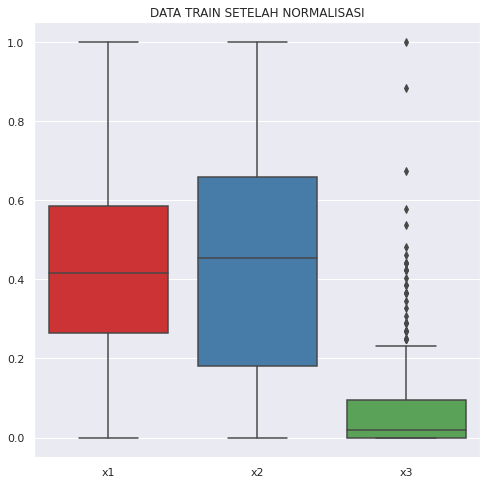

In [ ]:
#menampilkan data train sesudah normalisasi (boxplot)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data=df_train_normalisasi[['x1', 'x2', 'x3']], orient="v", palette="Set1")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('DATA TRAIN SETELAH NORMALISASI')

Text(0.5, 1.0, 'DATA TEST SEBELUM NORMALISASI')

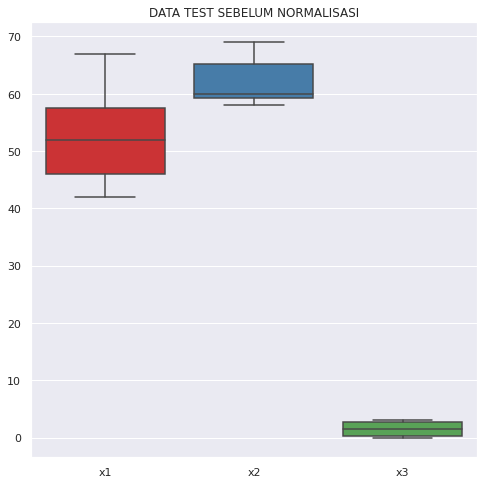

In [ ]:
#menampilkan data test sebelum normalisasi (boxplot)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data=dfTest[['x1', 'x2', 'x3']], orient="v", palette="Set1")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('DATA TEST SEBELUM NORMALISASI')

In [ ]:
#normalisasi data test (min-maks scaling)
df_test_normalisasi = pd.DataFrame(index=dfTest.index, columns=dfTest.columns)

xMaks = dfTest["x1"].max()
xMin  = dfTest["x1"].min()

for i in range(len(dfTest)):
    x = dfTest["x1"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_test_normalisasi["x1"][i] = float(xBaru)

xMaks = dfTest["x2"].max()
xMin  = dfTest["x2"].min()

for i in range(len(dfTest)):
    x = dfTest["x2"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_test_normalisasi["x2"][i] = float(xBaru)

xMaks = dfTest["x3"].max()
xMin  = dfTest["x3"].min()

for i in range(len(dfTest)):
    x = dfTest["x3"][i]
    xBaru = (x - xMin) / (xMaks - xMin)
    df_test_normalisasi["x3"][i] = float(xBaru)

df_test_normalisasi['x1'] = df_test_normalisasi['x1'].astype(float)
df_test_normalisasi['x2'] = df_test_normalisasi['x2'].astype(float)
df_test_normalisasi['x3'] = df_test_normalisasi['x3'].astype(float)
df_test_normalisasi['id'] = dfTest['id'].astype(str)
df_test_normalisasi['y'] = dfTest['y']
df_test_normalisasi

,id,x1,x2,x3,y
0,297,0.04,0.090909,0.666667,?
1,298,1.00,0.727273,0.000000,?
2,299,0.64,0.181818,1.000000,?
3,300,0.28,0.454545,1.000000,?
4,301,0.12,0.181818,0.000000,?
5,302,0.48,0.000000,0.333333,?
6,303,0.56,0.727273,1.000000,?
7,304,0.00,1.000000,0.333333,?
8,305,0.32,0.090909,0.666667,?
9,306,0.68,0.181818,0.000000,?


Text(0.5, 1.0, 'DATA TEST SETELAH NORMALISASI')

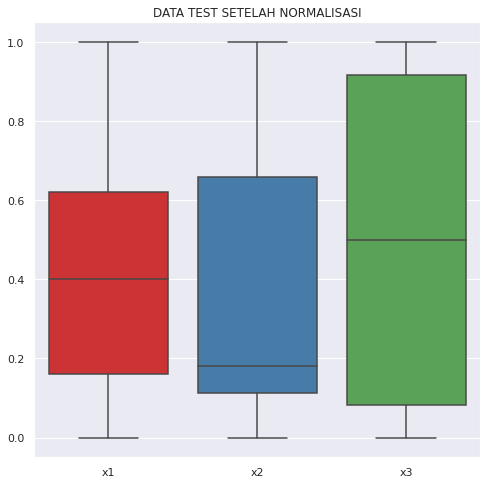

In [ ]:
#menampilkan data test sebelum normalisasi (boxplot)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(data=df_test_normalisasi[['x1', 'x2', 'x3']], orient="v", palette="Set1")
sns.set(rc={'figure.figsize':(8, 8)})
ax.set_xticklabels(['x1', 'x2', 'x3'])
plt.title('DATA TEST SETELAH NORMALISASI')

In [ ]:
start_time_kNN = time.time()

#metode Eucledian
def Euclidean(df_train_normalisasi, test):
    result = []
    for i in range(len(df_train_normalisasi)):
        jarak_x = math.sqrt((((df_train_normalisasi['x1'][i] - test['x1']) ** 2) +
                             ((df_train_normalisasi['x2'][i] - test['x2']) ** 2) + 
                             ((df_train_normalisasi['x3'][i] - test['x3']) ** 2)))
        result.append([jarak_x, df_train_normalisasi['y'][i]])

    return result

In [ ]:
#metode Manhattan
def Manhattan(df_train_normalisasi, test):
    result = []
    for i in range(len(df_train_normalisasi)):
        jarak = (abs(df_train_normalisasi['x1'][i] - test['x1']) + 
                 abs(df_train_normalisasi['x2'][i] - test['x2']) + 
                 abs(df_train_normalisasi['x3'][i] - test['x3']))
        result.append([jarak , df_train_normalisasi['y'][i]])

    return result

In [ ]:
#memanggil fungsi Euclidean (sorting, k data teratas, melakukan label vote)
def kNN_Euclidean(df_train_normalisasi, df_test_normalisasi, k):
    hasil = []

    for i in range(len(df_test_normalisasi)):
        jarak = Euclidean(df_train_normalisasi, df_test_normalisasi.iloc[[i]])
        jarak = sorted(jarak, key=lambda x:x[0])
        jarak_K = jarak[:k]
        y_satu = 0 
        y_nol = 0 

        for j in range(k):
            if jarak_K[j][1] == 1:
                y_satu += 1
            else:
                y_nol += 1

        if y_satu > y_nol:
            hasil.append([df_test_normalisasi.loc[i, 'id'], 1])
        else:
            hasil.append([df_test_normalisasi.loc[i, 'id'], 0])
            
    df_Hasil = pd.DataFrame(hasil, columns = ['id', 'y'])

    return df_Hasil

In [ ]:
#memanggil fungsi Manhattan (sorting, k data teratas, melakukan label vote)
def kNN_Manhattan(df_train_normalisasi, df_test_normalisasi, k):
    hasil = []
    for i in range(len(df_test_normalisasi)):
        jarak = Manhattan(df_train_normalisasi, df_test_normalisasi.iloc[i])
        jarak = sorted(jarak, key=lambda x:x[0])
        jarak_K = jarak[:k]
        y_satu = 0 
        y_nol = 0  

        for j in range(k):
            if jarak_K[j][1] == 1:
                y_satu += 1
            else:
                y_nol += 1

        if y_satu > y_nol:
            hasil.append([df_test_normalisasi.loc[i, 'id'], 1])
        else:
            hasil.append([df_test_normalisasi.loc[i, 'id'], 0])
            
    df_Hasil = pd.DataFrame(hasil, columns = ['id', 'y'])

    return df_Hasil

In [ ]:
def kNN(df_train_normalisasi, df_test_normalisasi, k):
    return {
        'manhattan' : kNN_Manhattan(df_train_normalisasi, df_test_normalisasi, k), 
        'euclidean' : kNN_Euclidean(df_train_normalisasi, df_test_normalisasi, k) 
    }

In [ ]:
def validasi(df_train_normalisasi, k):
    #fold1
    test_fold1  = df_train_normalisasi.iloc[:59].drop('y', axis = 1)
    train_fold1 = df_train_normalisasi.iloc[59:].reset_index().drop('index', axis = 1)
   
    #fold2
    test_fold2  = df_train_normalisasi.iloc[59:118].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    train_fold2 = pd.concat([df_train_normalisasi.iloc[:59], df_train_normalisasi.iloc[118:]]).reset_index().drop('index', axis = 1)
   
    #fold3
    test_fold3  = df_train_normalisasi.iloc[118:177].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    train_fold3 = pd.concat([df_train_normalisasi.iloc[:118], df_train_normalisasi.iloc[177:]]).reset_index().drop('index', axis = 1)
   
    #fold4
    test_fold4  = df_train_normalisasi.iloc[177:236].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    train_fold4 = pd.concat([df_train_normalisasi.iloc[:177], df_train_normalisasi.iloc[236:]]).reset_index().drop('index', axis = 1)
   
    #fold5
    test_fold5  = df_train_normalisasi.iloc[236:295].drop('y', axis = 1).reset_index().drop('index', axis = 1)
    train_fold5 = df_train_normalisasi.iloc[0:236].reset_index().drop('index', axis = 1)
    
    #hasil validasi
    hasil_fold1  = kNN(train_fold1, test_fold1, k)
    hasil_fold2  = kNN(train_fold2, test_fold2, k)
    hasil_fold3  = kNN(train_fold3, test_fold3, k)
    hasil_fold4  = kNN(train_fold4, test_fold4, k)
    hasil_fold5  = kNN(train_fold5, test_fold5, k)
    akurasi = []

    valid = 0
    #fold 1
    for i in range(len(hasil_fold1['euclidean'])):
        if hasil_fold1['euclidean']['y'][i] == df_train_normalisasi['y'][i]:
            valid += 1
    akurasi_fold = valid / len(hasil_fold1['euclidean'])
    akurasi.append(akurasi_fold)

    valid = 0
    #fold 2
    for i in range(len(hasil_fold1['euclidean'])):
        if hasil_fold2['euclidean']['y'][i] == df_train_normalisasi.iloc[59:118]['y'][i+59]:
            valid += 1
    akurasi_fold = valid / len(hasil_fold1['euclidean'])
    akurasi.append(akurasi_fold)

    valid = 0
    #fold 3
    for i in range(len(hasil_fold1['euclidean'])):
        if hasil_fold3['euclidean']['y'][i] == df_train_normalisasi.iloc[118:177]['y'][i+118]:
            valid += 1
    akurasi_fold = valid / len(hasil_fold1['euclidean'])
    akurasi.append(akurasi_fold)   

    valid = 0
    #fold 4
    for i in range(len(hasil_fold1['euclidean'])):
        if hasil_fold4['euclidean']['y'][i] == df_train_normalisasi.iloc[177:236]['y'][i+177]:
            valid += 1
    akurasi_fold = valid / len(hasil_fold1['euclidean'])
    akurasi.append(akurasi_fold)

    valid = 0
    #fold 5
    for i in range(len(hasil_fold1['euclidean'])):
        if hasil_fold5['euclidean']['y'][i] == df_train_normalisasi.iloc[236:295]['y'][i+236]:
            valid += 1
    akurasi_fold = valid / len(hasil_fold1['euclidean'])
    akurasi.append(akurasi_fold)

    
    return akurasi

[0.6610169491525424, 0.7796610169491526, 0.8135593220338984, 0.5423728813559322, 0.7288135593220338]
hasil validasi dengan k=5


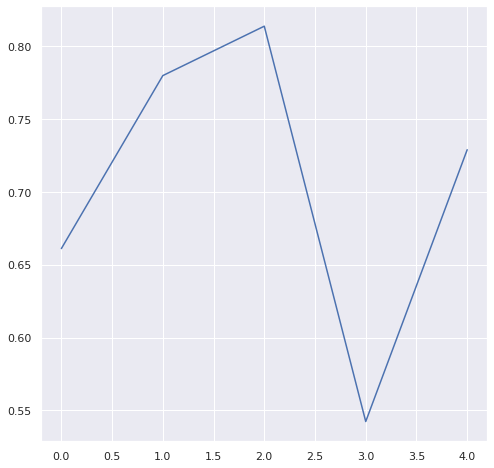

In [ ]:
# Hasil validasi #1
print(validasi(df_train_normalisasi, k=5))
print("hasil validasi dengan k=5")
plt.plot(validasi(df_train_normalisasi, k= 5))

[0.6779661016949152, 0.8305084745762712, 0.7966101694915254, 0.576271186440678, 0.7457627118644068]
hasil validasi dengan k=9


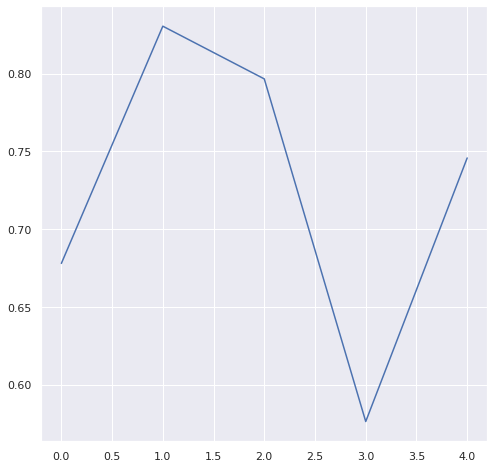

In [ ]:
# Hasil validasi #2
print(validasi(df_train_normalisasi, k=9))
print("hasil validasi dengan k=9")
plt.plot(validasi(df_train_normalisasi, k= 9))

[0.6949152542372882, 0.847457627118644, 0.847457627118644, 0.6101694915254238, 0.7457627118644068]
hasil validasi dengan k=15


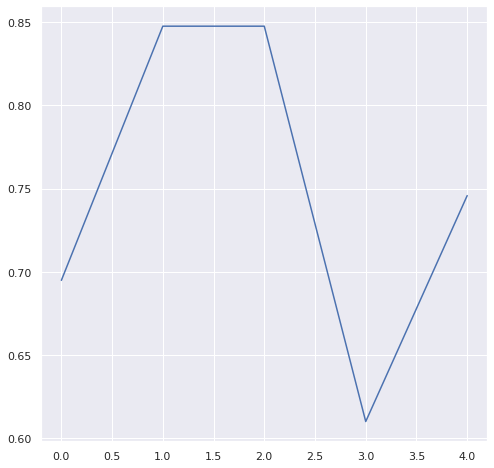

In [ ]:
# Hasil validasi #3
print(validasi(df_train_normalisasi, k=15))
print("hasil validasi dengan k=15")
plt.plot(validasi(df_train_normalisasi, k= 15))

[0.711864406779661, 0.8305084745762712, 0.8305084745762712, 0.5423728813559322, 0.7457627118644068]
hasil validasi dengan k=19


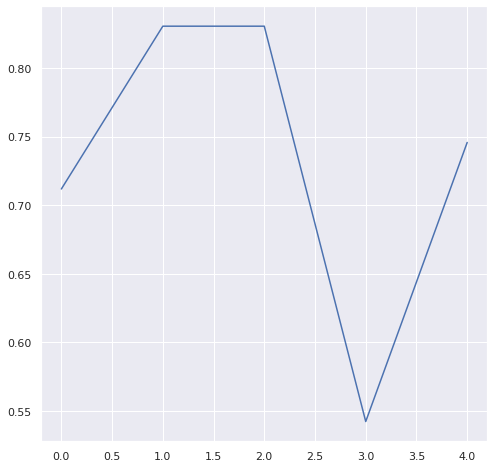

In [ ]:
# Hasil validasi #4
print(validasi(df_train_normalisasi, k=19))
print("hasil validasi dengan k=19")
plt.plot(validasi(df_train_normalisasi, k= 19))

[0.7627118644067796, 0.8135593220338984, 0.7966101694915254, 0.576271186440678, 0.7457627118644068]
hasil validasi dengan k=25


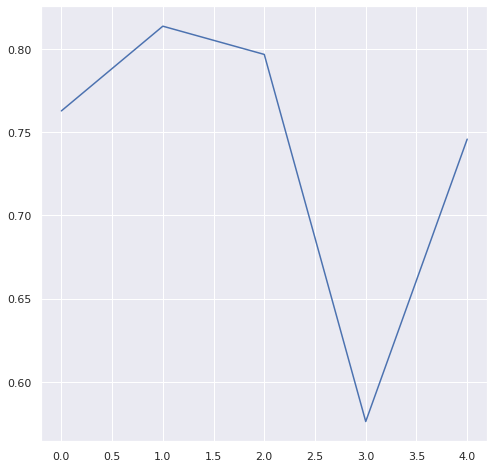

In [ ]:
# Hasil validasi #5
print(validasi(df_train_normalisasi, k=25))
print("hasil validasi dengan k=25")
plt.plot(validasi(df_train_normalisasi, k= 25))

In [ ]:
# pemanggilan fungsi kNN untuk mendapatkan hasil kNN dari manhattan dan euclidean
kNN = kNN(df_train_normalisasi, df_test_normalisasi, k=15)

In [ ]:
# akhir run program kNN
kNN_time = time.time() - start_time_kNN

kNN['euclidean']

,id,y
0,297,0
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,0
7,304,1
8,305,0
9,306,1


In [ ]:
kNN['manhattan']

,id,y
0,297,1
1,298,1
2,299,0
3,300,0
4,301,1
5,302,0
6,303,1
7,304,1
8,305,0
9,306,1


In [ ]:
print("PROSES SELESAI DENGAN WAKTU %s DETIK" % kNN_time)

PROSES SELESAI DENGAN WAKTU 2698.6916134357452 DETIK
